# Sessionization by both SendID Only

,SessionID,SessionDate,SessionDuration,RequestCount,CompanyCount,UserAgentCount,IPCount,IP3OctectCount,OpenCount,ClickCount,UniqueLinkCount
0,1,2019-07-15 12:21:35.107000000,5,2,1,1,1,1,1,0,1
1,2,2019-07-15 12:12:18.627000000,5,8,1,1,1,1,4,0,1
2,3,2019-07-15 12:28:37.240000000,5,2,1,1,2,1,1,0,1
3,4,2019-07-15 12:35:11.317000000,14,3,1,1,1,1,1,1,2
4,5,2019-07-15 12:07:23.203000000,5,3,1,1,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1001812,1001813,2019-07-15 12:40:24.883000000,5,2,1,1,1,1,1,0,1
1001813,1001814,2019-07-15 12:45:55.160000000,5,2,1,1,1,1,1,0,1
1001814,1001815,2019-07-15 12:36:44.150000000,5,2,1,1,1,1,1,0,1
1001815,1001816,2019-07-15 12:18:06.813000000,0,1,1,1,1,1,1,0,1


SessionID           int64
SessionDate        object
SessionDuration     int64
RequestCount        int64
CompanyCount        int64
UserAgentCount      int64
IPCount             int64
IP3OctectCount      int64
OpenCount           int64
ClickCount          int64
UniqueLinkCount     int64
dtype: object


<Figure size 432x288 with 0 Axes>

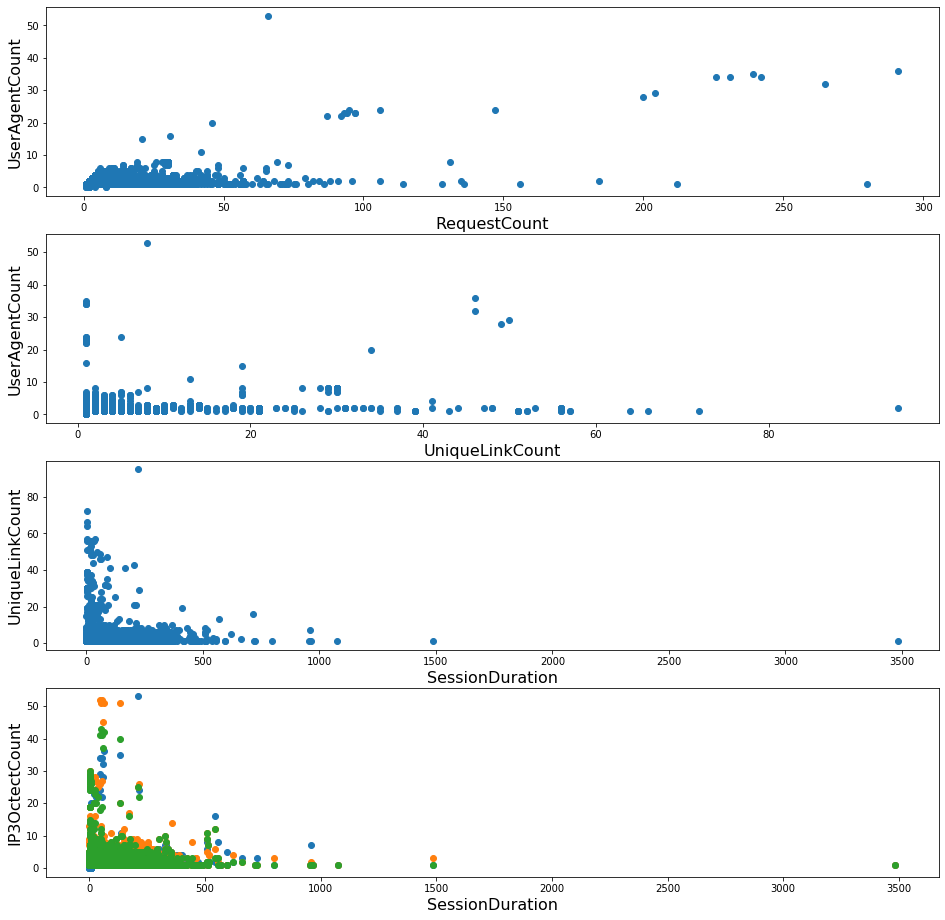

<Figure size 432x288 with 0 Axes>

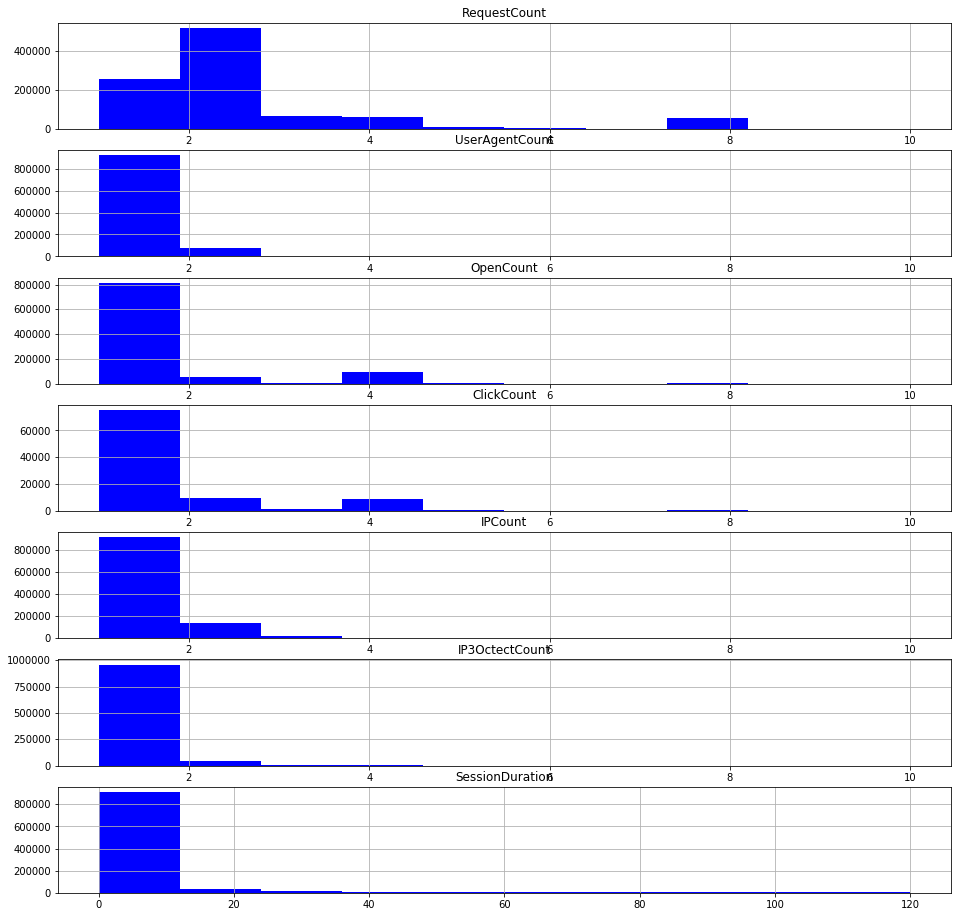

C:\Users\ryoucis\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,SessionID,SessionDuration,RequestCount,CompanyCount,UserAgentCount,IPCount,IP3OctectCount,OpenCount,ClickCount,UniqueLinkCount
SessionID,1,0.000365529,0.000341685,nan,0.000726333,-0.000457232,-0.000348576,-0.000154635,-3.50343e-05,0.000706057
SessionDuration,0.000365529,1,0.35821,nan,0.382216,0.233295,0.221974,0.232837,0.275779,0.296523
RequestCount,0.000341685,0.35821,1,nan,0.34419,0.295081,0.303411,0.849505,0.450095,0.340495
CompanyCount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
UserAgentCount,0.000726333,0.382216,0.34419,nan,1,0.392077,0.615664,0.135215,0.479623,0.54594
IPCount,-0.000457232,0.233295,0.295081,nan,0.392077,1,0.663539,0.149243,0.245497,0.305736
IP3OctectCount,-0.000348576,0.221974,0.303411,nan,0.615664,0.663539,1,0.13497,0.415622,0.499361
OpenCount,-0.000154635,0.232837,0.849505,nan,0.135215,0.149243,0.13497,1,0.0537399,0.0250287
ClickCount,-3.50343e-05,0.275779,0.450095,nan,0.479623,0.245497,0.415622,0.0537399,1,0.764721
UniqueLinkCount,0.000706057,0.296523,0.340495,nan,0.54594,0.305736,0.499361,0.0250287,0.764721,1


In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import matplotlib.cm as cm
from IPython.display import display

%matplotlib inline

df = pd.read_csv("C:/Users/ryoucis/Documents/EmailTrackingSessions_SendIDOnly.csv")

# Show dataframe
pd.options.display.max_columns = None
display(df) # show raw data
print(df.dtypes)

# Filter out outliers
df = df[df["RequestCount"] < 500]

# Show a few scatter
def SetScatterSubPlot(ax, X,Y):
    ax.set_xlabel(X, fontsize=16)
    ax.set_ylabel(Y, fontsize=16)
    ax.scatter(df[X], df[Y])

plt.clf()
fig, ax = plt.subplots(nrows=4, ncols=1, figsize = (16,16))    
SetScatterSubPlot(ax[0], "RequestCount", "UserAgentCount")
SetScatterSubPlot(ax[1], "UniqueLinkCount", "UserAgentCount")
SetScatterSubPlot(ax[2], "SessionDuration", "UniqueLinkCount")
SetScatterSubPlot(ax[3], "SessionDuration", "UserAgentCount")
SetScatterSubPlot(ax[3], "SessionDuration", "IPCount")
SetScatterSubPlot(ax[3], "SessionDuration", "IP3OctectCount")
plt.show()

# Histos
def SetHistoSubPlot(ax, X, bins=10, range=(1,10)):
    ax.hist(df[X], bins=bins, range=range, color="blue")
    ax.set_title(X)
    ax.grid(True)
    ax.tick_params('both')

plt.clf()
fig, ax = plt.subplots(nrows=7, ncols=1, figsize = (16,16))

SetHistoSubPlot(ax[0], "RequestCount")
SetHistoSubPlot(ax[1], "UserAgentCount")
SetHistoSubPlot(ax[2], "OpenCount")
SetHistoSubPlot(ax[3], "ClickCount")
SetHistoSubPlot(ax[4], "UniqueLinkCount")
SetHistoSubPlot(ax[4], "IPCount")
SetHistoSubPlot(ax[5], "IP3OctectCount")
SetHistoSubPlot(ax[6], "SessionDuration", range=(0,120))
plt.show()


# Show dataframe corrlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')